In [ ]:
pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.2/776.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pyreadr
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Data/dataset.rds'
data = pyreadr.read_r(path)
data = next(iter(data.values()))

In [ ]:
data['DATA_NASCITA'] = pd.to_datetime(data['DATA_NASCITA'], errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Eta'] = (data['Date'] - data['DATA_NASCITA']) / pd.Timedelta(days=365.25)
data.head()

,Alanina_aminotransferasi_alt,Albumina,Altezza,Basofili_perc,Colesterolo_Hdl,Colesterolo_totale,Creatinina,Distribuzione_di_volume,Ematocrito_hct,Emoglobina_conc_media_mchc,...,Attivita_fisica,Circonferenza_vita,Fumo,CAI,Date,Rh,AB0,SESSO,DATA_NASCITA,Eta
0,10.0,4.54,172.0,0.1,99.0,190.0,0.79,12.6,38.5,34.7,...,NaN,NaN,NaN,669.0,2009-02-02,1.0,2.0,2.0,1961-10-16,47.299110
1,13.0,4.50,172.0,0.4,96.0,202.0,0.65,13.6,40.1,33.8,...,NaN,NaN,NaN,669.0,2010-01-11,1.0,2.0,2.0,1961-10-16,48.238193
2,13.0,NaN,172.0,0.5,NaN,197.0,0.67,13.3,40.3,34.2,...,NaN,NaN,NaN,669.0,2010-07-14,1.0,2.0,2.0,1961-10-16,48.741958
3,30.0,5.05,173.0,0.7,97.0,226.0,0.73,12.7,44.0,32.3,...,NaN,NaN,NaN,669.0,2011-08-27,1.0,2.0,2.0,1961-10-16,49.861739
4,19.0,4.35,172.0,0.4,92.0,200.0,0.69,12.5,42.4,33.0,...,NaN,NaN,NaN,669.0,2012-06-19,1.0,2.0,2.0,1961-10-16,50.674880


In [ ]:
data.shape

(100203, 43)

In [ ]:
data.columns

Index(['Alanina_aminotransferasi_alt', 'Albumina', 'Altezza', 'Basofili_perc',
       'Colesterolo_Hdl', 'Colesterolo_totale', 'Creatinina',
       'Distribuzione_di_volume', 'Ematocrito_hct',
       'Emoglobina_conc_media_mchc', 'Emoglobina_hb',
       'Emoglobina_massa_media_mch', 'Eosinofili_perc', 'Eritrociti_rbc',
       'Ferritina', 'Ferro_totale', 'Glucosio', 'Leucociti_wbc',
       'Linfociti_perc', 'Monociti_perc', 'PMAX', 'Peso', 'Piastrine', 'Polso',
       'Proteine_totali', 'S_alfa_1_globuline', 'S_alfa_2_globuline',
       'S_beta_1_globuline', 'S_beta_2_globuline', 'S_gamma_globuline',
       'Trigliceridi', 'Volume_medio', 'Alcool', 'Attivita_fisica',
       'Circonferenza_vita', 'Fumo', 'CAI', 'Date', 'Rh', 'AB0', 'SESSO',
       'DATA_NASCITA', 'Eta'],
      dtype='object')

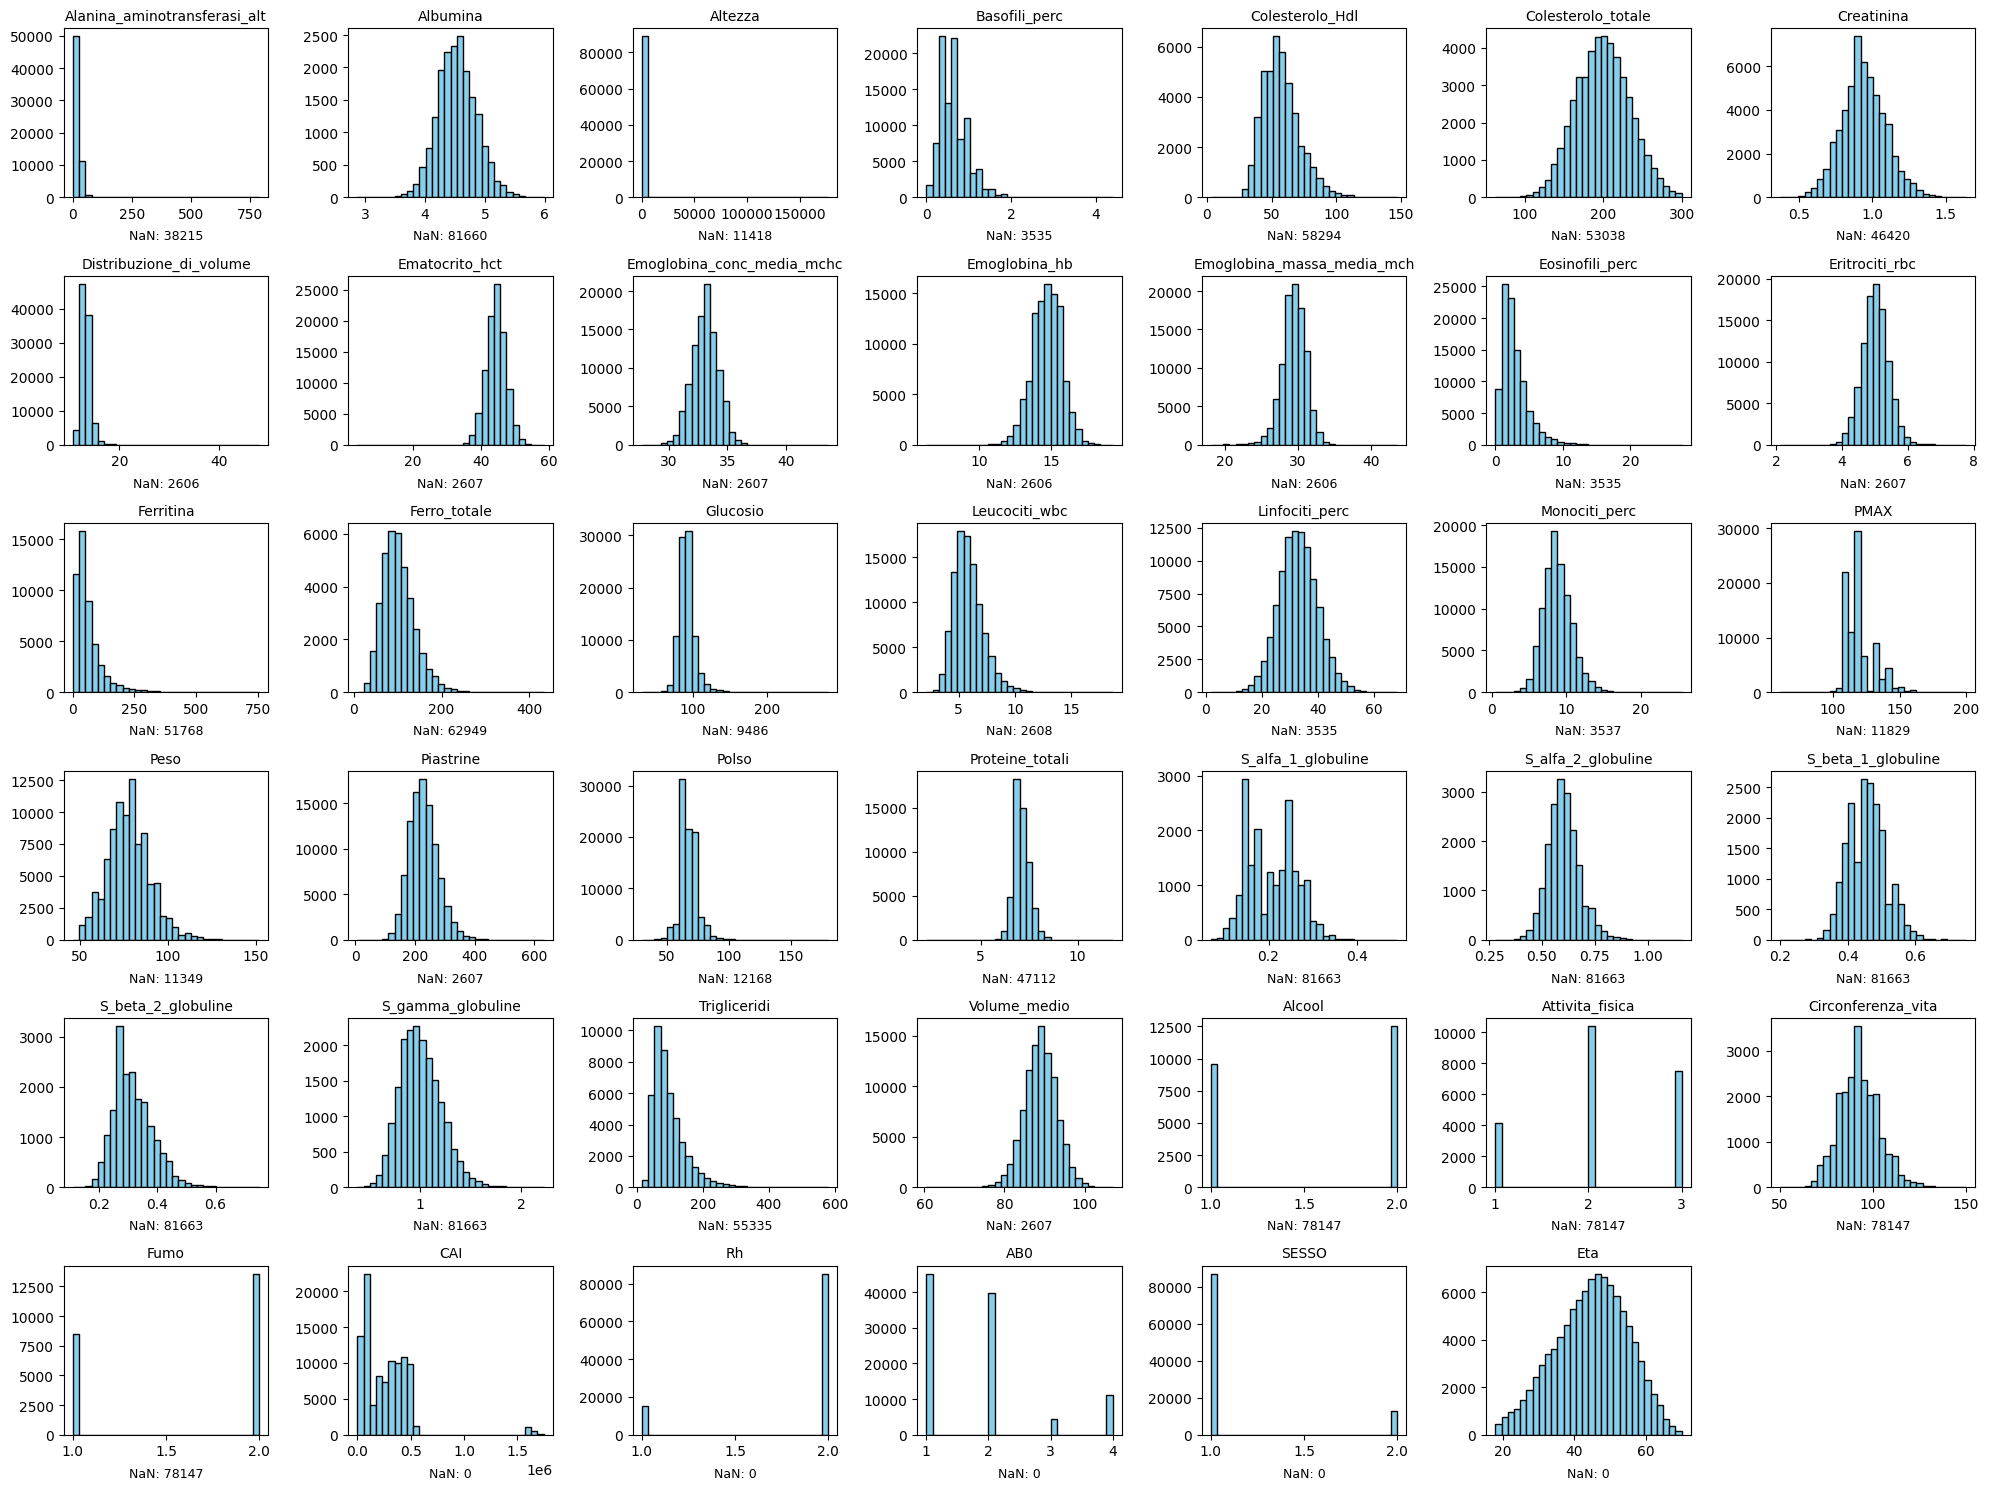

In [ ]:
num_cols = data.select_dtypes(include=['number']).columns
n = len(num_cols)
rows = 6
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols[:rows*cols]):
    col_data = data[col].dropna()
    nan_count = data[col].isna().sum()

    axes[i].hist(col_data, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=10)

    axes[i].text(
        0.5, -0.25,
        f"NaN: {nan_count}",
        fontsize=9,
        ha='center',
        transform=axes[i].transAxes
    )

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

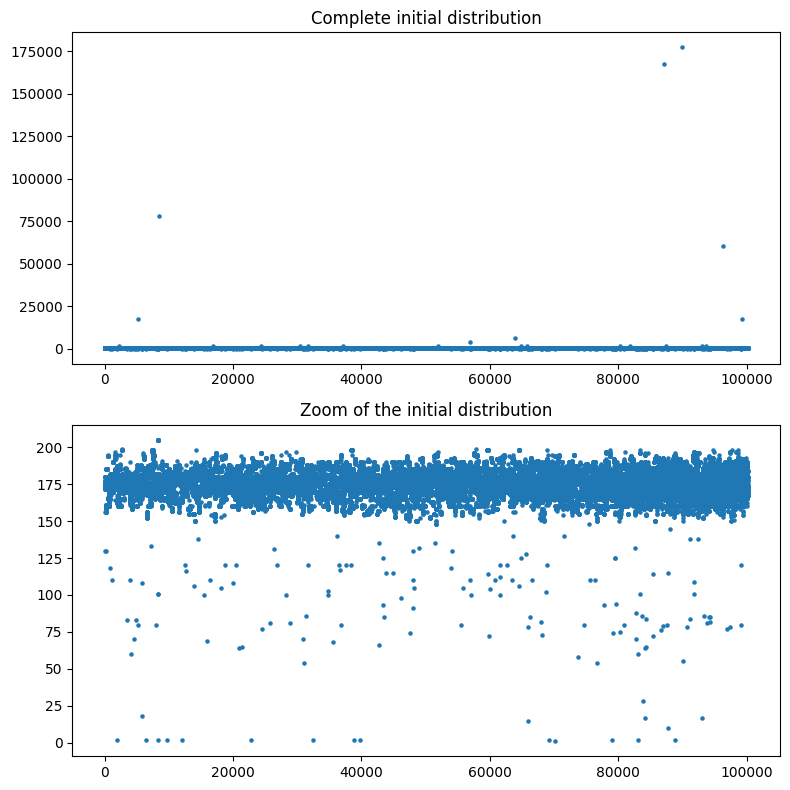

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

axes[0].scatter(data.index, data["Altezza"], s=5)
axes[0].set_title("Complete initial distribution")

limite = 500
subset = data[data["Altezza"] < limite]

axes[1].scatter(subset.index, subset["Altezza"], s=5)
axes[1].set_title("Zoom of the initial distribution")

plt.tight_layout()
plt.show()

In [ ]:
cols_to_drop = [
    "Albumina",
    "S_alfa_1_globuline",
    "S_alfa_2_globuline",
    "S_beta_1_globuline",
    "S_beta_2_globuline",
    "S_gamma_globuline",
    "Alcool",
    "Attivita_fisica",
    "Circonferenza_vita",
    "Fumo"
]

cols_to_drop_existing = [col for col in cols_to_drop if col in data.columns]

df = data.drop(columns=cols_to_drop_existing)

In [ ]:
df.head()

,Alanina_aminotransferasi_alt,Altezza,Basofili_perc,Colesterolo_Hdl,Colesterolo_totale,Creatinina,Distribuzione_di_volume,Ematocrito_hct,Emoglobina_conc_media_mchc,Emoglobina_hb,...,Proteine_totali,Trigliceridi,Volume_medio,CAI,Date,Rh,AB0,SESSO,DATA_NASCITA,Eta
0,10.0,172.0,0.1,99.0,190.0,0.79,12.6,38.5,34.7,13.4,...,6.8,61.0,89.2,669.0,2009-02-02,1.0,2.0,2.0,1961-10-16,47.299110
1,13.0,172.0,0.4,96.0,202.0,0.65,13.6,40.1,33.8,13.5,...,6.7,45.0,90.0,669.0,2010-01-11,1.0,2.0,2.0,1961-10-16,48.238193
2,13.0,172.0,0.5,NaN,197.0,0.67,13.3,40.3,34.2,13.8,...,6.7,NaN,89.1,669.0,2010-07-14,1.0,2.0,2.0,1961-10-16,48.741958
3,30.0,173.0,0.7,97.0,226.0,0.73,12.7,44.0,32.3,14.2,...,7.6,55.0,91.7,669.0,2011-08-27,1.0,2.0,2.0,1961-10-16,49.861739
4,19.0,172.0,0.4,92.0,200.0,0.69,12.5,42.4,33.0,14.0,...,6.5,42.0,89.3,669.0,2012-06-19,1.0,2.0,2.0,1961-10-16,50.674880


In [ ]:
df.shape

(100203, 33)

In [ ]:
def fix_heights_by_cai(df,
                       id_col="CAI",
                       h_col="Altezza",
                       min_h=145,
                       max_h=205):
    if not set([id_col, h_col]).issubset(df.columns):
        raise KeyError(f"Requested columns not present: {id_col}, {h_col}")

    def get_mode_valid(s):
        s_valid = s.dropna()
        s_valid = s_valid[(s_valid >= min_h) & (s_valid <= max_h)]
        if s_valid.empty:
            return np.nan
        return s_valid.value_counts().idxmax()

    modes = (
        df
        .groupby(id_col, dropna=False)[h_col]
        .apply(get_mode_valid)
        .reset_index()
        .rename(columns={h_col: "height_mode"})
    )
    df_fixed = df.merge(modes, on=id_col, how="left")
    mask = (
        df_fixed[h_col].isna() |
        (df_fixed[h_col] < min_h) |
        (df_fixed[h_col] > max_h)
    )

    df_fixed[h_col] = np.where(mask, df_fixed["height_mode"], df_fixed[h_col])
    df_fixed = df_fixed.drop(columns=["height_mode"])
    def safe_min(s):
        s = s.dropna()
        return s.min() if not s.empty else np.nan

    def safe_max(s):
        s = s.dropna()
        return s.max() if not s.empty else np.nan

    height_variation = (
        df_fixed
        .groupby(id_col, dropna=False)[h_col]
        .agg(h_min=safe_min, h_max=safe_max)
        .reset_index()
    )

    height_variation["h_range"] = (
        height_variation["h_max"] - height_variation["h_min"]
    )

    return {
        "df_fixed": df_fixed,
        "height_variation": height_variation
    }

res = fix_heights_by_cai(df, id_col="CAI", h_col="Altezza")
df = res["df_fixed"]
variazioni = res["height_variation"]
variazioni[variazioni["h_range"] > 30]

,CAI,h_min,h_max,h_range
489,65240.0,154.0,185.0,31.0
1578,236589.0,152.0,192.0,40.0
2033,325147.0,150.0,181.0,31.0
3014,450785.0,154.0,185.0,31.0
3307,474214.0,161.0,196.0,35.0
3395,481109.0,150.0,190.0,40.0
3769,509614.0,167.0,198.0,31.0


In [ ]:
def fix_single_height_outlier(df,
                              id_col="CAI",
                              h_col="Altezza",
                              tol=10,
                              n_outliers_to_fix=1):

    if not set([id_col, h_col]).issubset(df.columns):
        raise KeyError(f"Requested columns not present: {id_col}, {h_col}")

    df_tmp = df.copy()
    def get_mode(s):
        s = s.dropna()
        if s.empty:
            return np.nan
        return s.value_counts().idxmax()

    df_tmp["_mode"] = df_tmp.groupby(id_col)[h_col].transform(get_mode)

    cond_na = df_tmp[h_col].isna() | df_tmp["_mode"].isna()
    df_tmp["_diff"] = np.where(
        cond_na,
        np.nan,
        (df_tmp[h_col] - df_tmp["_mode"]).abs()
    )

    df_tmp["_is_out"] = df_tmp["_diff"] > tol

    df_tmp["_n_out"] = df_tmp.groupby(id_col)["_is_out"].transform(
        lambda s: s.sum(skipna=True)
    )

    df_tmp["_change"] = df_tmp["_is_out"] & (df_tmp["_n_out"] <= n_outliers_to_fix)

    df_tmp.loc[df_tmp["_change"], h_col] = df_tmp.loc[df_tmp["_change"], "_mode"]

    n_changed = int(df_tmp["_change"].sum())

    df_fixed = df_tmp.drop(columns=["_mode", "_diff", "_is_out", "_n_out", "_change"])

    return {
        "df_fixed": df_fixed,
        "n_changed": n_changed
    }

res_fix = fix_single_height_outlier(df, id_col="CAI", h_col="Altezza", tol=9, n_outliers_to_fix=4)

df = res_fix["df_fixed"]

n_changed = res_fix["n_changed"]
print("Modified values:", n_changed)


Modified values: 285


In [ ]:
def check_height_outliers(df,
                          id_col="CAI",
                          h_col="Altezza",
                          tol=10):

    if not set([id_col, h_col]).issubset(df.columns):
        raise KeyError(f"Requested columns not present: {id_col}, {h_col}")

    df_out = df.copy()

    def get_mode(s):
        s = s.dropna()
        if s.empty:
            return np.nan
        return s.value_counts().idxmax()

    df_out["_mode"] = df_out.groupby(id_col)[h_col].transform(get_mode)

    cond_na = df_out[h_col].isna() | df_out["_mode"].isna()
    df_out["_diff"] = np.where(
        cond_na,
        np.nan,
        (df_out[h_col] - df_out["_mode"]).abs()
    )

    df_out["_is_out"] = df_out["_diff"] > tol

    cai_with_outliers = (
        df_out
        .groupby(id_col, dropna=False)["_is_out"]
        .sum(min_count=1)
        .reset_index()
        .rename(columns={"_is_out": "n_outliers"})
    )

    cai_with_outliers = cai_with_outliers[cai_with_outliers["n_outliers"] > 0]

    n_cai_with_outliers = len(cai_with_outliers)
    n_rows_outlier_totale = int(df_out["_is_out"].sum())

    return {
        "cai_with_outliers": cai_with_outliers,
        "n_cai_with_outliers": n_cai_with_outliers,
        "n_rows_outlier_totale": n_rows_outlier_totale
    }


In [ ]:
res_check = check_height_outliers(df, id_col="CAI", h_col="Altezza", tol=10)

cai_con_outlier        = res_check["cai_with_outliers"]
n_cai_con_outlier      = res_check["n_cai_with_outliers"]
n_righe_outlier_totale = res_check["n_rows_outlier_totale"]

print(cai_con_outlier.head())
print("CAI with at least two outliers:", n_cai_con_outlier)
print("Rows with outlier tot:", n_righe_outlier_totale)

Empty DataFrame
Columns: [CAI, n_outliers]
Index: []
CAI with at least two outliers: 0
Rows with outlier tot: 0


In [ ]:
# At this point, we used the mice package on R in order to fill in the Nan values
# The R code is in the file named mice.R, producing the dataset df_mice, that we import
# Now we performed some transformations as explained in the Report, producing the dataset df_mice_transformed

In [ ]:
df_mice = pd.read_csv("/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes/Data/df_mice.csv")

In [ ]:
df_mice.columns

Index(['Alanina_aminotransferasi_alt', 'Basofili_perc', 'Colesterolo_totale',
       'Creatinina', 'Distribuzione_di_volume', 'Ematocrito_hct',
       'Emoglobina_conc_media_mchc', 'Emoglobina_hb',
       'Emoglobina_massa_media_mch', 'Eosinofili_perc', 'Eritrociti_rbc',
       'Ferritina', 'Ferro_totale', 'Leucociti_wbc', 'Linfociti_perc',
       'Monociti_perc', 'Piastrine', 'Polso', 'Proteine_totali',
       'Volume_medio', 'Eta', 'CAI', 'Date', 'DATA_NASCITA', 'PMAX',
       'Glucosio', 'Trigliceridi', 'Colesterolo_Hdl', 'BMI', 'Peso', 'Altezza',
       'SESSO', 'Rh', 'AB0'],
      dtype='object')

In [ ]:
numerical_cols_all = df_mice.select_dtypes(include=['number']).columns
num_cols = [col for col in numerical_cols_all if 'Unnamed' not in col]
cols_to_remove = ['CAI', 'AB0', 'SESSO', 'Rh']
num_cols = [col for col in num_cols if col not in cols_to_remove]

# Calculated skewness (asymmetry) and concentrate on "right-skew" for log correction
skewness = df_mice[num_cols].skew()
skew_threshold = 0.5

# List of columns to be transformed
skewed_cols = skewness[skewness > skew_threshold].index

print(f"Columns identified with skew > {skew_threshold}:")
print(list(skewed_cols))

for col in skewed_cols:
    if (df_mice[col] < 0).any():
        print(f"ATTENTION: Column '{col}' has negative values. No log transformation.")
        continue

    print(f"log1p transformation applied to: {col}")
    df_mice[col] = np.log1p(df_mice[col])

    new_skew = df_mice[col].skew()
    print(f"New skew for '{col}': {new_skew:.2f}")

    transformed_cols = list(skewed_cols)

Columns identified with skew > 0.5:
['Alanina_aminotransferasi_alt', 'Basofili_perc', 'Distribuzione_di_volume', 'Eosinofili_perc', 'Ferritina', 'Ferro_totale', 'Leucociti_wbc', 'Monociti_perc', 'Polso', 'PMAX', 'Glucosio', 'Trigliceridi', 'Colesterolo_Hdl', 'BMI']
log1p transformation applied to: Alanina_aminotransferasi_alt
New skew for 'Alanina_aminotransferasi_alt': 0.47
log1p transformation applied to: Basofili_perc
New skew for 'Basofili_perc': 0.34
log1p transformation applied to: Distribuzione_di_volume
New skew for 'Distribuzione_di_volume': 1.11
log1p transformation applied to: Eosinofili_perc
New skew for 'Eosinofili_perc': 0.30
log1p transformation applied to: Ferritina
New skew for 'Ferritina': 0.14
log1p transformation applied to: Ferro_totale
New skew for 'Ferro_totale': -0.21
log1p transformation applied to: Leucociti_wbc
New skew for 'Leucociti_wbc': 0.28
log1p transformation applied to: Monociti_perc
New skew for 'Monociti_perc': -0.50
log1p transformation applied to:

In [ ]:
target_list = ['PMAX', 'Glucosio', 'Trigliceridi', 'Colesterolo_Hdl', 'BMI']
other_non_features = ['CAI', 'AB0', 'SESSO', 'Rh']
numerical_cols_all = df_mice.select_dtypes(include=['number']).columns
num_cols = [col for col in numerical_cols_all if 'Unnamed' not in col]
cols_to_scale = [
    col for col in num_cols
    if col not in target_list and col not in other_non_features
]

print(f"Are going to be scaled {len(cols_to_scale)}:")
print(cols_to_scale)

if cols_to_scale:
    scaler = StandardScaler()

    # Scale
    df_mice[cols_to_scale] = scaler.fit_transform(df_mice[cols_to_scale])
else:
    print("No columns to be scaled.")

Are going to be scaled 23:
['Alanina_aminotransferasi_alt', 'Basofili_perc', 'Colesterolo_totale', 'Creatinina', 'Distribuzione_di_volume', 'Ematocrito_hct', 'Emoglobina_conc_media_mchc', 'Emoglobina_hb', 'Emoglobina_massa_media_mch', 'Eosinofili_perc', 'Eritrociti_rbc', 'Ferritina', 'Ferro_totale', 'Leucociti_wbc', 'Linfociti_perc', 'Monociti_perc', 'Piastrine', 'Polso', 'Proteine_totali', 'Volume_medio', 'Eta', 'Peso', 'Altezza']


In [ ]:
data = df_mice

corr_matrix = data.corr(numeric_only=True)
threshold = 0.6

corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
               .stack()
               .reset_index()
)
corr_pairs.columns = ["var1", "var2", "corr"]

strong_corr = (
    corr_pairs
    .loc[corr_pairs["corr"].abs() >= threshold]
    .sort_values(by="corr", key=lambda s: s.abs(), ascending=False)
)

print(f"\nCouples of variables with |correlation| >= {threshold}:")
if strong_corr.empty:
    print("No couple above treshold.")
else:
    print(strong_corr.to_string(index=False))


Couples of variables with |correlation| >= 0.6:
                      var1           var2     corr
            Ematocrito_hct  Emoglobina_hb 0.883789
                       BMI           Peso 0.827616
Emoglobina_massa_media_mch   Volume_medio 0.811369
            Ematocrito_hct Eritrociti_rbc 0.796915
             Emoglobina_hb Eritrociti_rbc 0.713015


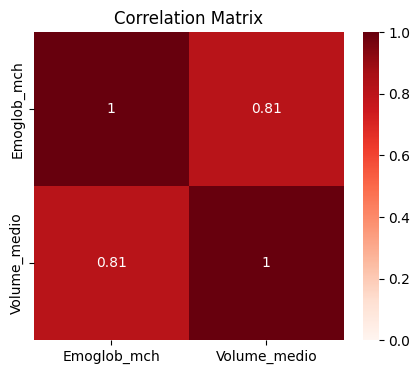

In [ ]:
subset = df_mice[['Emoglobina_massa_media_mch', 'Volume_medio']]

corr_matrix = subset.corr()

corr_matrix.rename(
    index={'Emoglobina_massa_media_mch':'Emoglob_mch',
           'Volume_medio':'Volume_medio'},
    columns={'Emoglobina_massa_media_mch':'Emoglob_mch',
             'Volume_medio':'Volume_medio'},
    inplace=True
)

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", vmin=0, vmax=1)
plt.title("Correlation Matrix")

plt.show()

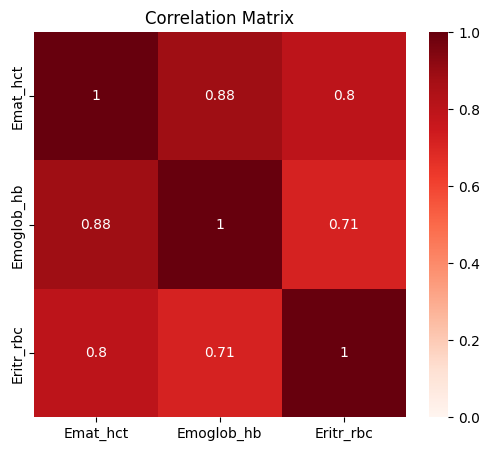

In [ ]:
subset = df_mice[['Ematocrito_hct', 'Emoglobina_hb', 'Eritrociti_rbc']]

corr_matrix = subset.corr()

corr_matrix.rename(
    index={
        'Ematocrito_hct':'Emat_hct',
        'Emoglobina_hb':'Emoglob_hb',
        'Eritrociti_rbc':'Eritr_rbc'
    },
    columns={
        'Ematocrito_hct':'Emat_hct',
        'Emoglobina_hb':'Emoglob_hb',
        'Eritrociti_rbc':'Eritr_rbc'
    },
    inplace=True
)

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", vmin=0, vmax=1)
plt.title("Correlation Matrix")

plt.show()